In [202]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier

2.1. Generate x, y coordinates of spirally distributed blobs in two colors. See figure below. You can search for code online to do this.

2.1.1.	Note that the spirals should complete at least one full turn.

2.1.2.	Add some noise to x and y.

In [203]:
def make_spirals(n_samples, noise):
  x = np.empty(n_samples)
  y = np.empty(n_samples)
  labels = np.empty(n_samples)

  for i in range(n_samples):
    theta = np.random.uniform(0, 2 * np.pi)

    if i % 2 == 0:
      r = 2 * theta + np.pi
      labels[i] = 0

    else:
      r = -2 * theta - np.pi
      labels[i] = 1

    x[i] = r * np.cos(theta) + np.random.normal(0, noise)
    y[i] = r * np.sin(theta) + np.random.normal(0, noise)

  return np.column_stack((x, y)), labels

X, labels = make_spirals(1000, 0.5)

2.2. Display a scatter plot of the x and y coordinates using the label as color. Label is the spiral number such as 0 and 1. You may use any color map i.e., the colors corresponding to 0 and 1.

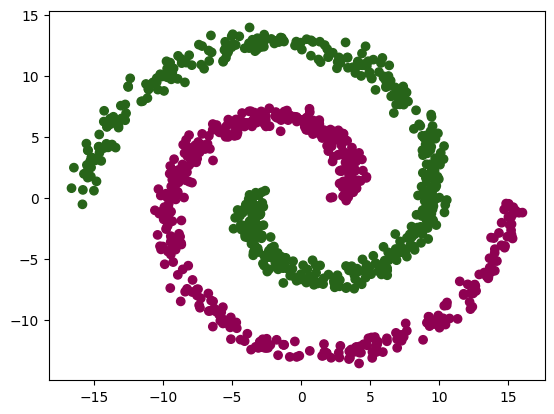

In [204]:
plt.scatter(X[:, 0], X[:, 1], c = labels, cmap = 'PiYG')

2.3.	Create partitions with 70% train dataset. Stratify the split. Use random state of 2023.

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, stratify=labels, random_state=2023)

2.4. Now train the network using MLP Classifier from scikit learn. The parameters are your choice. (2)

In [206]:
model = MLPClassifier(hidden_layer_sizes=(50, 50), activation='tanh', max_iter=1000,
                      random_state=2023, learning_rate_init=0.01, solver='adam',
                      alpha=0.001, verbose=True)

model.fit(X_train, y_train)

Iteration 1, loss = 0.81561290
Iteration 2, loss = 0.68150115
Iteration 3, loss = 0.60100002
Iteration 4, loss = 0.55631643
Iteration 5, loss = 0.50305689
Iteration 6, loss = 0.43120816
Iteration 7, loss = 0.36746764
Iteration 8, loss = 0.29178953
Iteration 9, loss = 0.23546777
Iteration 10, loss = 0.17893263
Iteration 11, loss = 0.13944472
Iteration 12, loss = 0.10868639
Iteration 13, loss = 0.08779636
Iteration 14, loss = 0.07182611
Iteration 15, loss = 0.06176790
Iteration 16, loss = 0.05399626
Iteration 17, loss = 0.04515139
Iteration 18, loss = 0.04233628
Iteration 19, loss = 0.04312364
Iteration 20, loss = 0.04129039
Iteration 21, loss = 0.03808287
Iteration 22, loss = 0.03105086
Iteration 23, loss = 0.02461183
Iteration 24, loss = 0.02314235
Iteration 25, loss = 0.02149053
Iteration 26, loss = 0.02304221
Iteration 27, loss = 0.02039780
Iteration 28, loss = 0.01701056
Iteration 29, loss = 0.01513174
Iteration 30, loss = 0.01409784
Iteration 31, loss = 0.01418778
Iteration 32, los

MLPClassifier(activation='tanh', alpha=0.001, hidden_layer_sizes=(50, 50),
              learning_rate_init=0.01, max_iter=1000, random_state=2023,
              verbose=True)

2.5. Plot the loss curve.

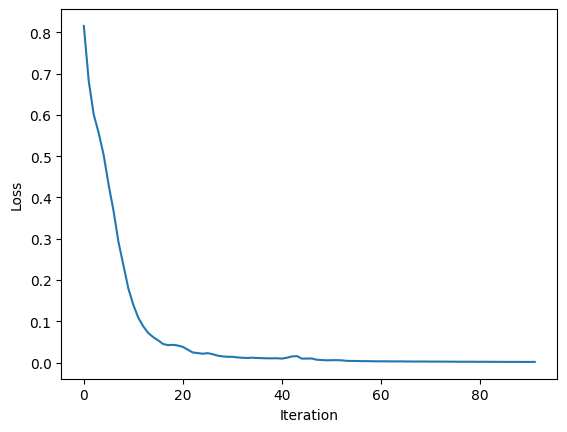

In [207]:
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.plot(model.loss_curve_)

2.6. Print the accuracy of the test partition.

In [208]:
print("Accuracy:", model.score(X_test, y_test))

Accuracy: 0.9966666666666667


2.7. Display the confusion matrix.

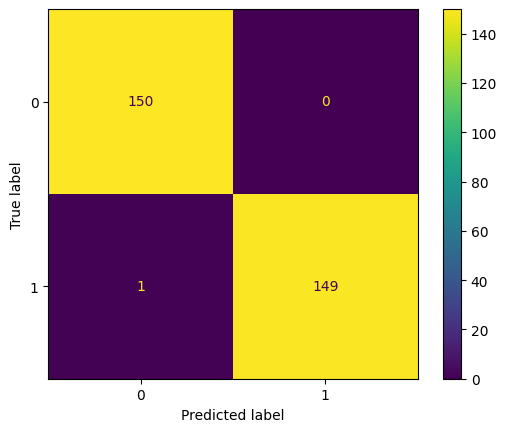

In [209]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels = model.classes_)
ConfusionMatrixDisplay(confusion_matrix = cm).plot()

2.8.	Plot the decision boundary (along with the original spirals). The decision boundary is the line where samples of one class are on one side and samples of another class are on the other side.

a.	To plot the decision boundary, create a mesh of x and y coordinates that cover the entire field (e.g., -20 to 20 for both x and y coordinates).

b.	You can make the mesh points 0.1 apart. So, you will have a 400x400 mesh grid.

c.	Then reshape the meshgrid to a dataframe that has two columns and 160000 rows (each row is a mesh point).

d.	Then classify each point using the trained model (model.predict)

e.	Then plot both the original data points (spirals) and the mesh data points. This generates the decision boundary as shown below (green vs light blue). Use color maps of your choice.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


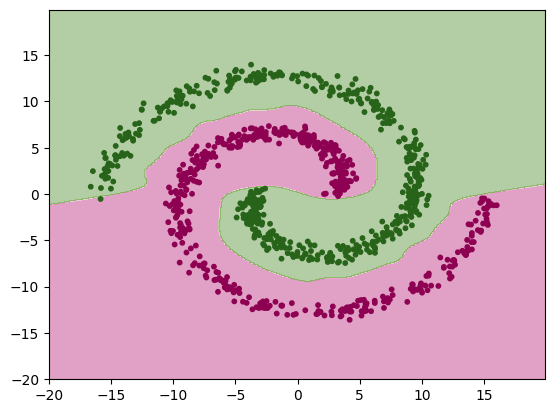

In [212]:
mesh_x = np.arange(-20, 20, 0.1)
mesh_y = np.arange(-20, 20, 0.1)
mesh_x, mesh_y = np.meshgrid(mesh_x, mesh_y)

meshpoints = pd.DataFrame({'X': np.reshape(mesh_x, 160000), 'Y': np.reshape(mesh_y, 160000)})

mesh_predictions = model.predict(meshpoints)
mesh_predictions = mesh_predictions.reshape(mesh_x.shape)

# Plot the decision boundary and original data points
plt.contourf(mesh_x, mesh_y, mesh_predictions, cmap='PiYG', alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='PiYG', marker='o', s=10)